# Análise exploratória de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. Coleta de dados

In [2]:
data = pd.read_csv('../data/processed/preprocessingM.csv')
data

,Carga Horária,Categoria da Situação,Cor/Raça,Data de Início do Ciclo,Data de Fim Previsto do Ciclo,Faixa Etária,Fator Esforço Curso,Idade,Instituição,Mês de Ocorrência da Situação,Região,Renda Familiar,Sexo,Turno,UF,Unidade de Ensino
0,4560,0,branca,2017-04-07,2019-12-21,15 a 19 anos,1.0,18.0,CPII,2019-12-01,Região Sudeste,"1,5<RFP<=2,5",Feminino,Matutino,RJ,Campus Tijuca II
1,4560,0,branca,2017-04-07,2019-12-21,15 a 19 anos,1.0,18.0,CPII,2019-12-01,Região Sudeste,Não declarada,Masculino,Matutino,RJ,Campus Tijuca II
2,4560,0,branca,2017-04-07,2019-12-21,15 a 19 anos,1.0,18.0,CPII,2019-12-01,Região Sudeste,"RFP>3,5",Feminino,Matutino,RJ,Campus Tijuca II
3,4560,0,branca,2017-04-07,2019-12-21,15 a 19 anos,1.0,18.0,CPII,2019-12-01,Região Sudeste,Não declarada,Feminino,Matutino,RJ,Campus Tijuca II
4,4560,0,branca,2017-04-07,2019-12-21,15 a 19 anos,1.0,18.0,CPII,2019-12-01,Região Sudeste,"RFP>3,5",Feminino,Matutino,RJ,Campus Tijuca II


In [3]:
data['Categoria da Situação'] =  data['Categoria da Situação'].apply(lambda x: 'Evadido' if x==1 else 'Concluinte')

In [78]:
data.head()

,Carga Horária,Categoria da Situação,Cor/Raça,Data de Início do Ciclo,Data de Fim Previsto do Ciclo,Faixa Etária,Fator Esforço Curso,Idade,Instituição,Mês de Ocorrência da Situação,Região,Renda Familiar,Sexo,Turno,UF,Unidade de Ensino
0,4560,Concluinte,branca,2017-04-07,2019-12-21,15 a 19 anos,1.0,18.0,CPII,2019-12-01,Região Sudeste,"1,5<RFP<=2,5",Feminino,Matutino,RJ,Campus Tijuca II
1,4560,Concluinte,branca,2017-04-07,2019-12-21,15 a 19 anos,1.0,18.0,CPII,2019-12-01,Região Sudeste,Não declarada,Masculino,Matutino,RJ,Campus Tijuca II
2,4560,Concluinte,branca,2017-04-07,2019-12-21,15 a 19 anos,1.0,18.0,CPII,2019-12-01,Região Sudeste,"RFP>3,5",Feminino,Matutino,RJ,Campus Tijuca II
3,4560,Concluinte,branca,2017-04-07,2019-12-21,15 a 19 anos,1.0,18.0,CPII,2019-12-01,Região Sudeste,Não declarada,Feminino,Matutino,RJ,Campus Tijuca II
4,4560,Concluinte,branca,2017-04-07,2019-12-21,15 a 19 anos,1.0,18.0,CPII,2019-12-01,Região Sudeste,"RFP>3,5",Feminino,Matutino,RJ,Campus Tijuca II


In [79]:
data.shape

(4250, 16)

In [80]:
# data = pd.read_csv('../data/processed/preprocessingM.csv')
# data

## 2. Descrição dos dados





### 2.1. Dicionário de dados

In [35]:
dicionario = pd.read_csv('../data/external/dicionario.csv', sep=',')
dicionario

,Variável,Significado,Tipo,Subtipo
0,Carga Horária,Carga horária do ciclo de matrícula.,Quantitativa,Discreta
1,Categoria da Situação,"Situações de matrícula: concluintes, em curso ...",Qualitativa,Nominal
2,Código da Matrícula,Código da matrícula.,Quantitativa,Discreta
3,Cor/Raça,Cor/Raça do aluno.,Qualitativa,Nominal
4,Data de Início do Ciclo,Data de início do ciclo de matrícula.,Quantitativa,Discreta
5,Data de Fim Previsto do Ciclo,Data prevista para o final do ciclo de matrícula.,Quantitativa,Discreta
6,Faixa Etária,Agrupamento baseado na idade dos estudantes.,Qualitativa,Ordinal
7,Fator Esforço Curso,Ajusta a contagem de matrículas-equivalentes p...,Quantitativa,Continua
8,Idade,Idade do estudante.,Quantitativa,Discreta
9,Instituição,Sigla da Instituição.,Qualitativa,Nominal


In [17]:
#data.select_dtypes(include='object')

In [81]:
#data ['UF'].unique()

In [38]:
#categorica = data.select_dtypes(include='object')

In [18]:
#data.select_dtypes(exclude='object')

In [40]:
#numerica = data.select_dtypes(exclude='object')

## 3. Perguntas de partida e hipóteses

### Qual a distribuição dos dados (variável por variável)?

In [23]:
data.describe(include='all')

,Carga Horária,Categoria da Situação,Cor/Raça,Data de Início do Ciclo,Data de Fim Previsto do Ciclo,Faixa Etária,Fator Esforço Curso,Idade,Instituição,Mês de Ocorrência da Situação,Região,Renda Familiar,Sexo,Turno,UF,Unidade de Ensino
count,4250.000000,4250,4250,4250,4250,4250,4250.000000,4250.000000,4250,4250,4250,4250,4250,4250,4250,4250
unique,NaN,2,6,44,41,8,NaN,NaN,10,84,3,7,2,4,6,18
top,NaN,Concluinte,branca,2017-04-07,2019-12-21,15 a 19 anos,NaN,NaN,CPII,2020-01-01,Região Sudeste,Não declarada,Feminino,Matutino,RJ,Campus São Cristóvão III
freq,NaN,3279,1937,1185,1219,3471,NaN,NaN,2828,1066,3233,1409,2211,2690,3008,588
mean,3991.135294,NaN,NaN,NaN,NaN,NaN,1.028944,18.494118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,932.709563,NaN,NaN,NaN,NaN,NaN,0.033193,1.602125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2400.000000,NaN,NaN,NaN,NaN,NaN,1.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2800.000000,NaN,NaN,NaN,NaN,NaN,1.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4560.000000,NaN,NaN,NaN,NaN,NaN,1.000000,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4560.000000,NaN,NaN,NaN,NaN,NaN,1.067000,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Distribuição das variáveis qualitativas

In [4]:
sns.set_style('whitegrid')

In [7]:
def show_bars(subplot_value, x_value, hue_value, dataset, palette='plasma', order=None):
    plt.subplot(subplot_value)
    ax = sns.countplot(x = x_value, hue = hue_value, data = dataset,palette=palette, order=order)
    # ax.set(xlabel = x_value, ylabel = 'Quantidade e Percentual')
    x_value = x_value.replace('_',' ')
    x_value = x_value.replace(x_value[0],x_value[0].upper())
    ax.set_xlabel(x_value, fontsize=15)
    ax.set_ylabel("Quantidade e Percentual", fontsize=15)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    #ax.spines['left'].set_visible(True)
    #ax.spines['bottom'].set_visible(True)
    ax.legend(fontsize=15)
    
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    
    for bars in ax.containers:
        for x, p in enumerate(bars):
            total = sum(xgroup[x] for xgroup in all_heights) 
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(f'{p.get_height()}\n{percentage}', (p.get_x() + p.get_width() / 2, p.get_height()), size=12, ha='center', va='bottom')
   

    x_ticks = [item.get_text() for item in ax.get_xticklabels()]
    if len(x_ticks[0]) > 17:
        ax.set_xticklabels(x_ticks, rotation=45, fontsize=12)
    else:
        ax.set_xticklabels(x_ticks, fontsize=12)

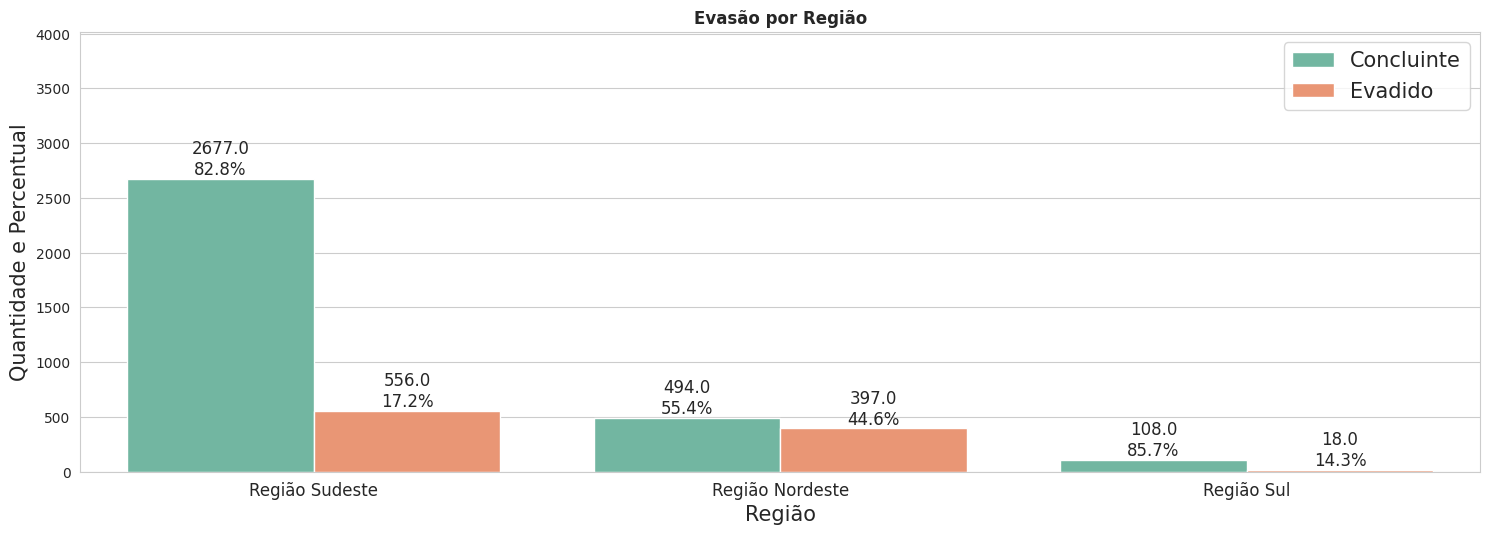

In [84]:
# Criar a figura
plt.figure(figsize=(15, 10))

# Gráfico 1
show_bars(211, 'Região', 'Categoria da Situação', data, palette='Set2')
plt.title('Evasão por Região', fontweight='bold')  # Definir a fonte do título como Arial
plt.margins(y=0.5)  
plt.tight_layout()

# Exibir o gráfico
plt.show()


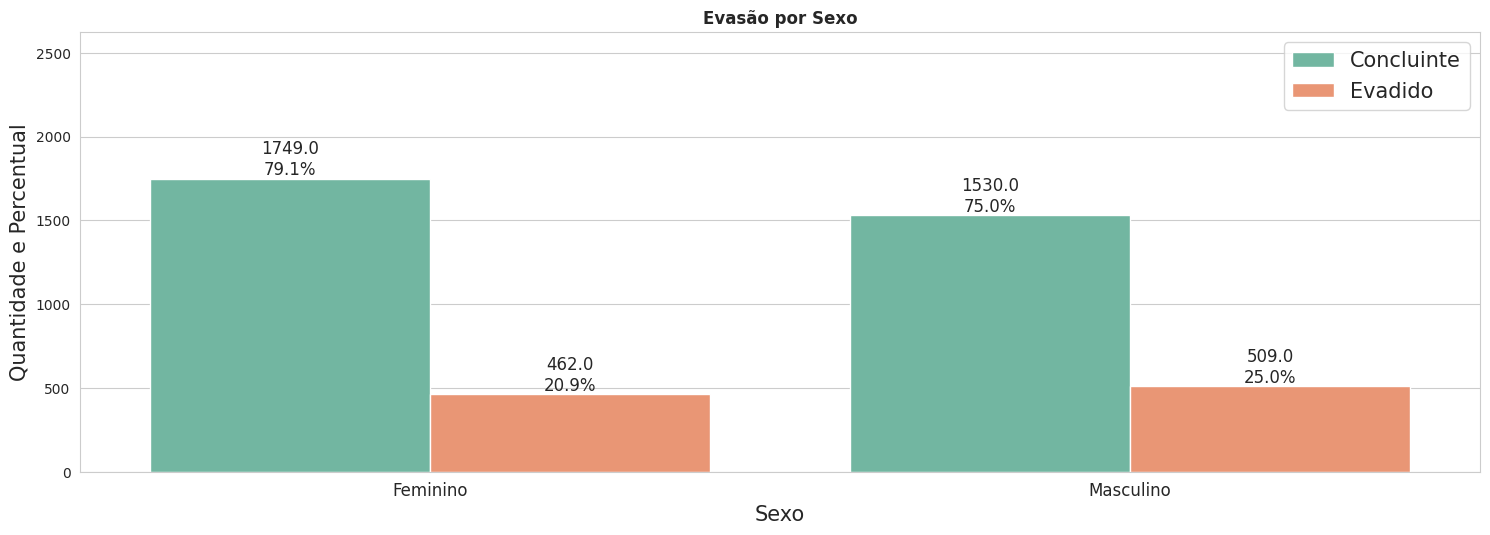

In [29]:
# Criar a figura
plt.figure(figsize=(15, 10))
# Gráfico 2
show_bars(212, 'Sexo', 'Categoria da Situação', data, palette='Set2')
plt.title('Evasão por Sexo', fontweight='bold')  # Definir a fonte do título como Arial
plt.margins(y=0.5)  

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()



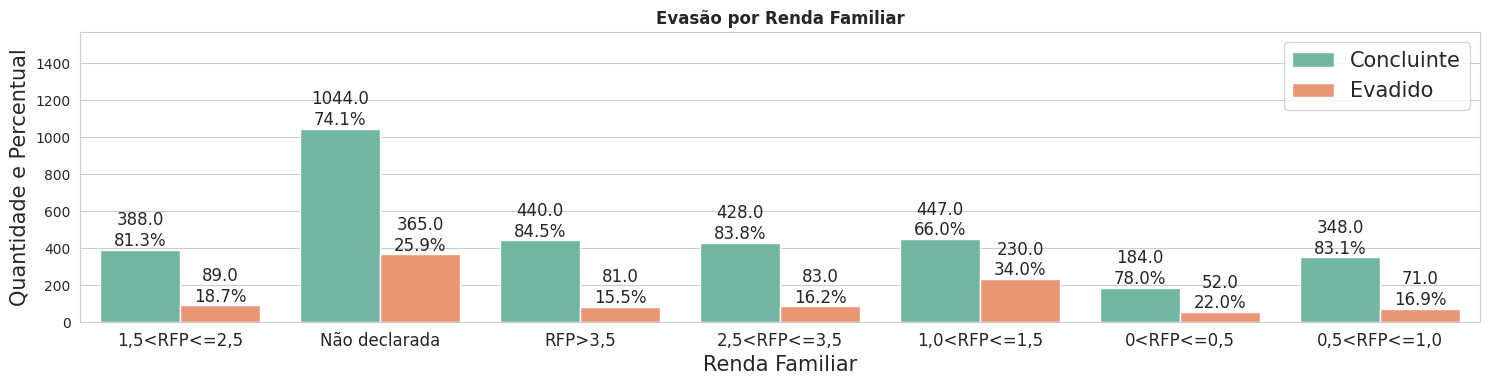

In [85]:
# Configurar a fonte para Arial
#plt.rcParams['font.family'] = 'Arial'

# Criar a figura
plt.figure(figsize=(15, 7))

# Gerar o gráfico
show_bars(211, 'Renda Familiar', 'Categoria da Situação', data, palette='Set2')

# Adicionar título com fonte Arial
plt.title('Evasão por Renda Familiar', fontweight='bold')  # Definir a fonte do título como Arial
plt.margins(y=0.5)

# Ajustar o layout
plt.tight_layout()

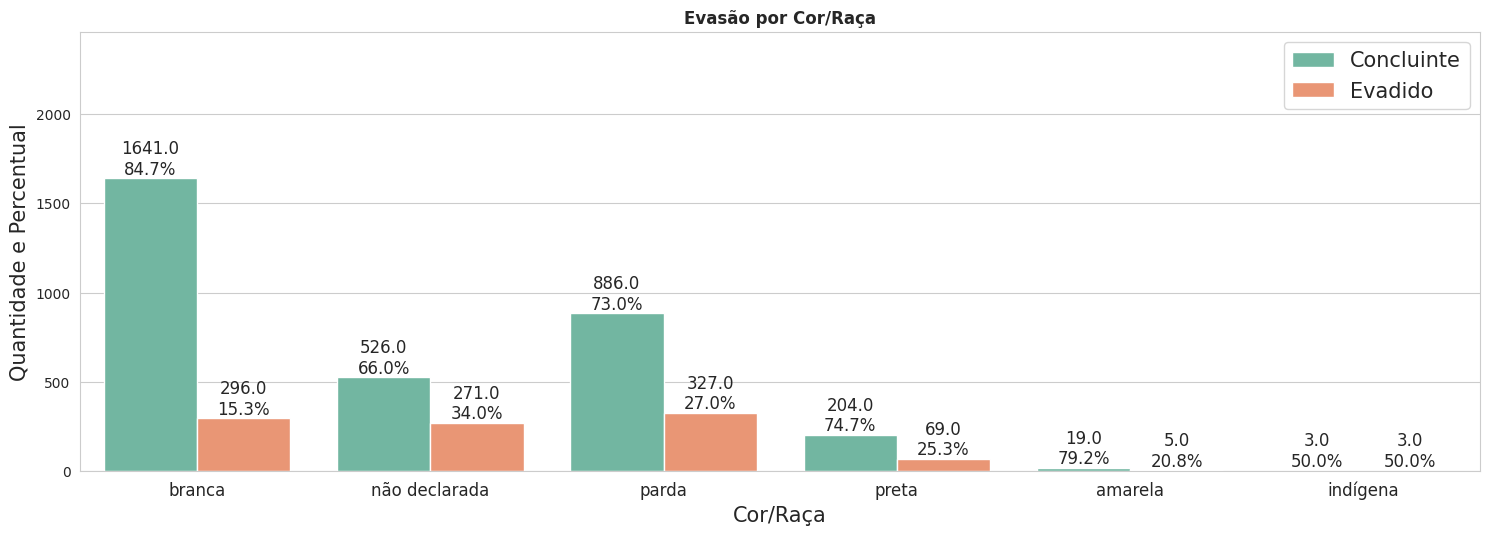

In [87]:
# Configurar a fonte para Arial
#plt.rcParams['font.family'] = 'Arial'

# Criar a figura
plt.figure(figsize=(15, 10))

# Gerar o gráfico
show_bars(211, 'Cor/Raça', 'Categoria da Situação', data, palette='Set2')

# Adicionar título com fonte Arial
plt.title('Evasão por Cor/Raça', fontweight='bold')  # Definir a fonte do título como Arial
plt.margins(y=0.5)

# Ajustar o layout
plt.tight_layout()


In [51]:
data['Idade'].quantile(0.95)

20.0

Só 5% dos dados estão acima dos 20 anos de idade.

In [40]:
faixa_ate_29anos = data[data['Faixa Etária'].isin(['15 a 19 anos', '20 a 24 anos','25 a 29 anos'])]

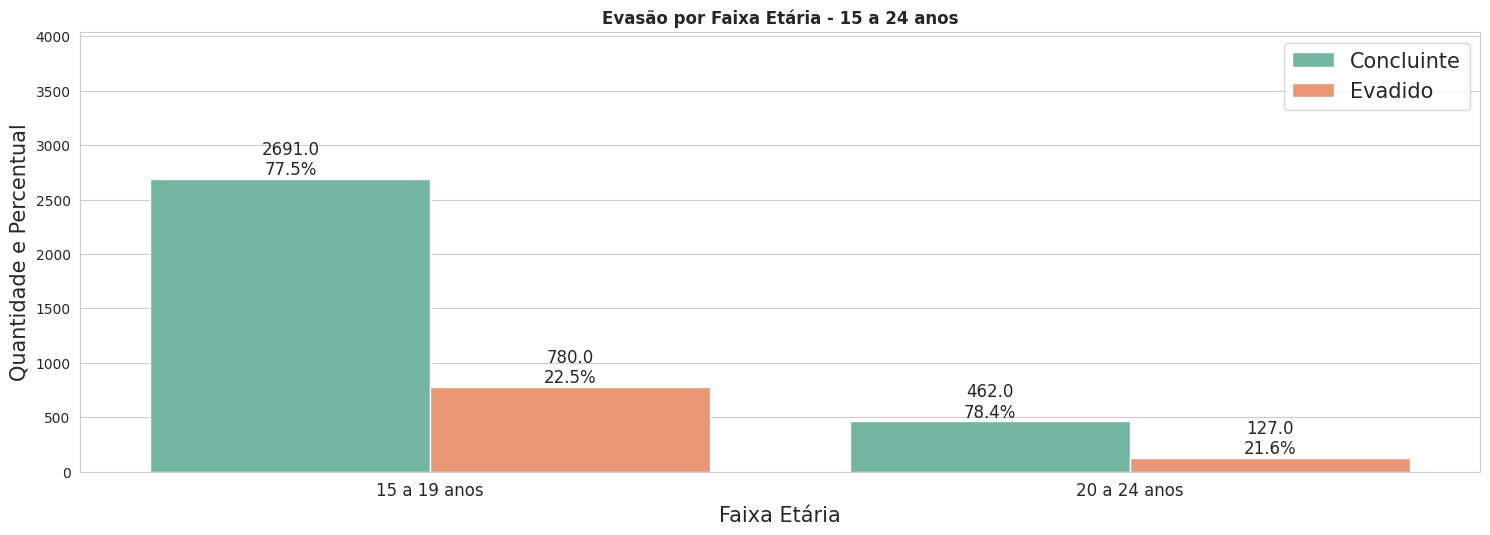

In [89]:
# Configurar a fonte para Arial
#plt.rcParams['font.family'] = 'Arial'


plt.figure(figsize=(15, 10))
show_bars(211, 'Faixa Etária', 'Categoria da Situação', faixa_ate_29anos[faixa_ate_29anos['Idade']<=20], palette='Set2')
plt.title('Evasão por Faixa Etária - 15 a 24 anos',fontweight='bold')
plt.margins(y=0.5)  
plt.tight_layout()
plt.show()



In [42]:
faixa_acima_29anos = data[data['Faixa Etária'].isin(['30 a 34 anos', '35 a 39 anos', '55 a 59 anos', 'Maior de 60 anos',
       '50 a 54 anos', '45 a 49 anos'])]

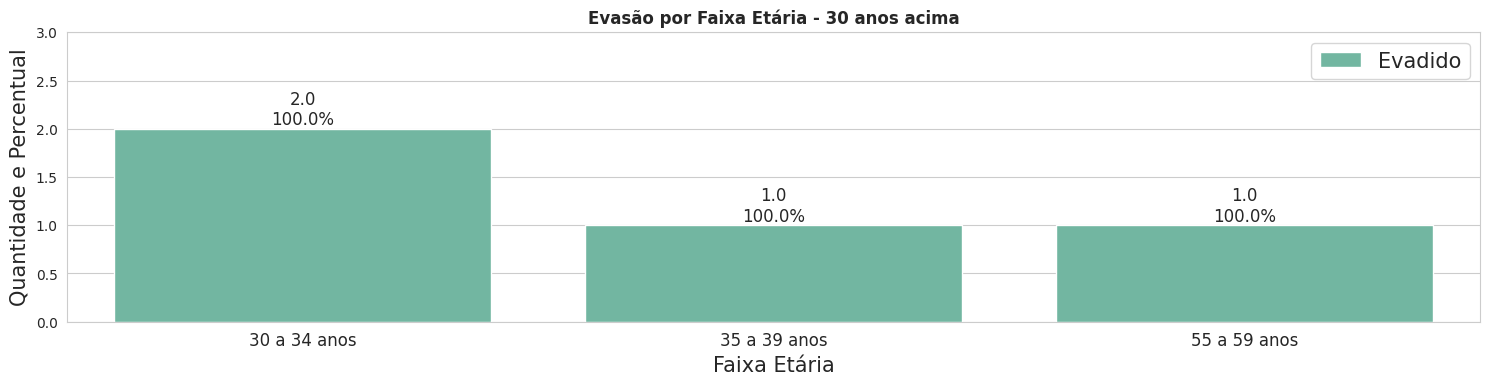

In [90]:
#plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(15, 7))
show_bars(211, 'Faixa Etária', 'Categoria da Situação', faixa_acima_29anos, palette='Set2')
plt.title('Evasão por Faixa Etária - 30 anos acima',fontweight='bold')
plt.margins(y=0.5)  
plt.tight_layout()

In [59]:
evadidos_ordenados=pd.crosstab(data['Unidade de Ensino'], data['Categoria da Situação'], normalize='index').reset_index().sort_values('Evadido', ascending=False)
evadidos_ordenados=evadidos_ordenados[evadidos_ordenados['Evadido']<1].head(20)

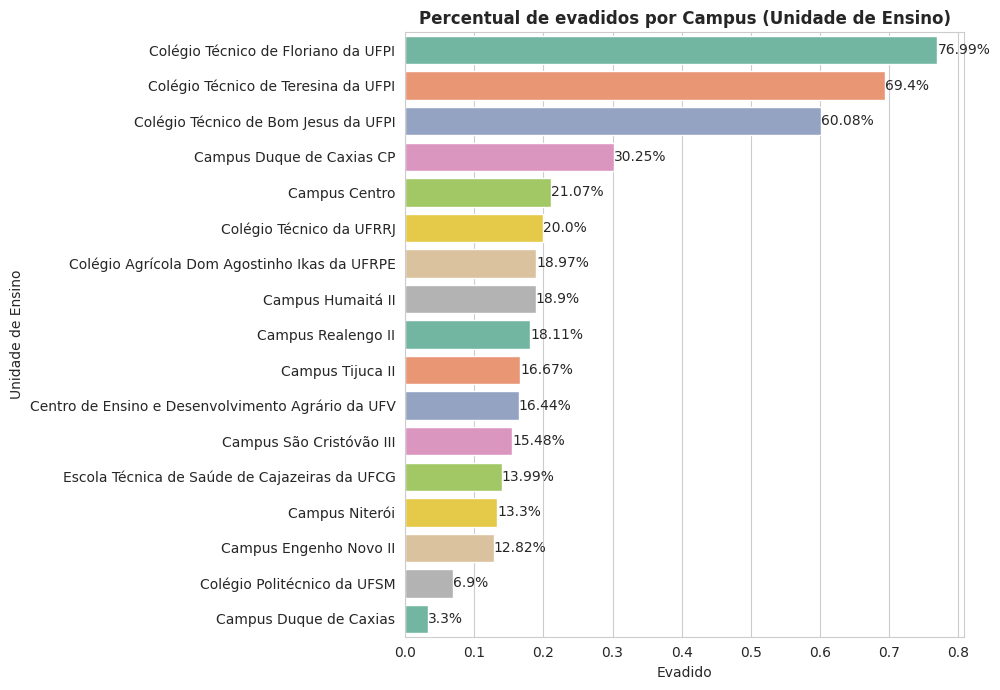

In [91]:
#plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(10, 7))
ax= sns.barplot(evadidos_ordenados,y='Unidade de Ensino',x='Evadido', palette='Set2')
ax.bar_label(ax.containers[0], fmt=lambda x:f'{round(x*100,2)}%')
plt.title("Percentual de evadidos por Campus (Unidade de Ensino)",
          fontweight='bold')
plt.tight_layout()

In [63]:
uf_nova=pd.crosstab(data['UF'], data['Categoria da Situação'], normalize='index').reset_index().sort_values('Evadido', ascending=False)
uf_nova=uf_nova[uf_nova['Evadido']<1].head(20)

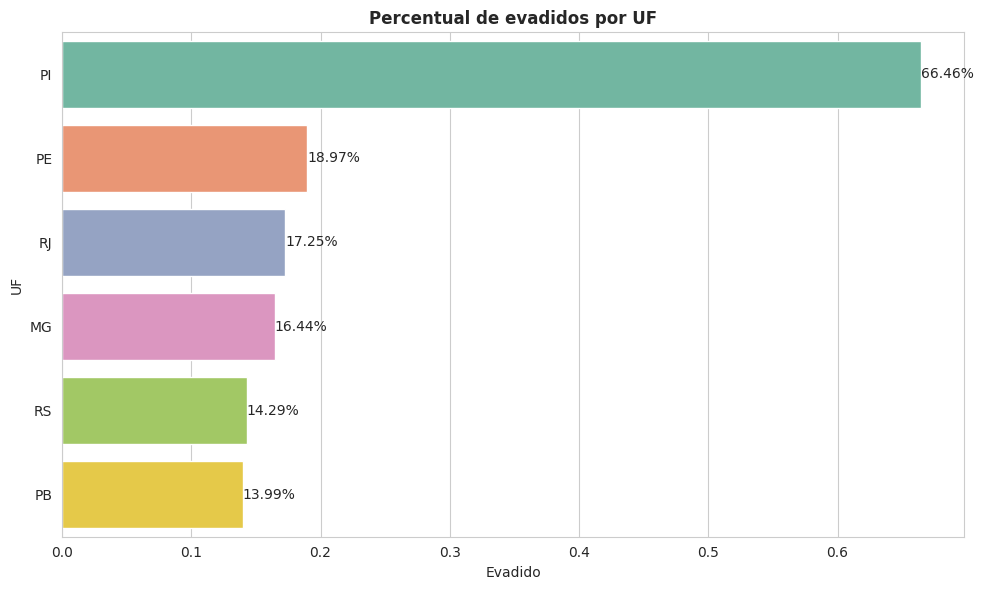

In [92]:
#plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(10, 6))
ax= sns.barplot(uf_nova,y='UF',x='Evadido', palette='Set2')
ax.bar_label(ax.containers[0], fmt=lambda x:f'{round(x*100,2)}%')
plt.title("Percentual de evadidos por UF",
          fontweight='bold')
plt.tight_layout()

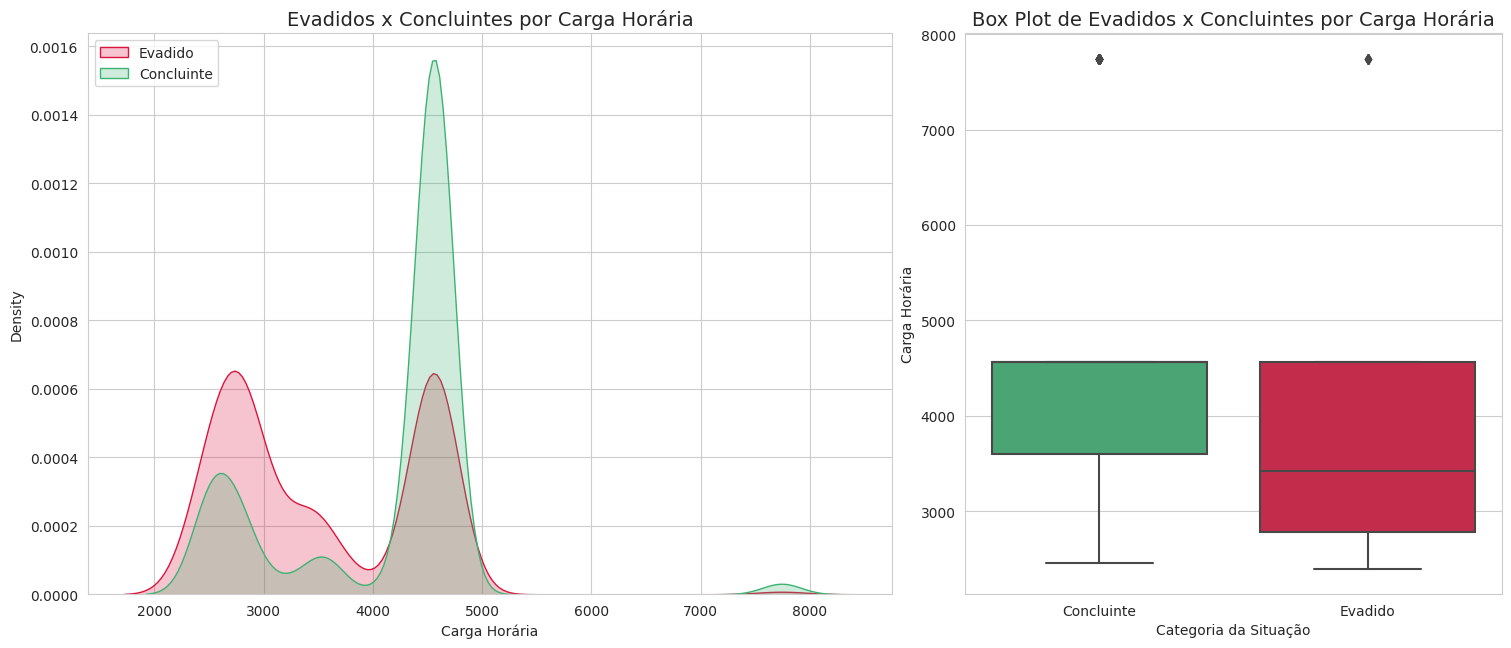

In [93]:
#plt.rcParams['font.family'] = 'Arial'
fig = plt.figure(constrained_layout=True, figsize=(15, 12))

gs = GridSpec(2, 5, figure=fig)
ax1 = fig.add_subplot(gs[0, :3])
ax2 = fig.add_subplot(gs[0, 3:])

sns.kdeplot(data[data['Categoria da Situação']=='Evadido']['Carga Horária'], ax=ax1,
             color='crimson', shade=True, label='Evadido')
sns.kdeplot(data[data['Categoria da Situação']=='Concluinte']['Carga Horária'], ax=ax1,
             color='mediumseagreen', shade=True, label='Concluinte')
ax1.set_title('Evadidos x Concluintes por Carga Horária', size=14)
ax1.legend(loc='upper left')

sns.boxplot(x='Categoria da Situação', y='Carga Horária', data=data, palette=['mediumseagreen','crimson'], ax=ax2)
ax2.set_title('Box Plot de Evadidos x Concluintes por Carga Horária', size=14)
fig.show()

- Estudantes com cargas horárias menores (em torno de 3000 horas) parecem ter maior probabilidade de evasão. Contudo, há uma sobreposição significativa entre as distribuições de evadidos e concluintes, sugerindo que a carga horária sozinha não é um fator determinante para a evasão, e outros fatores devem ser considerados.

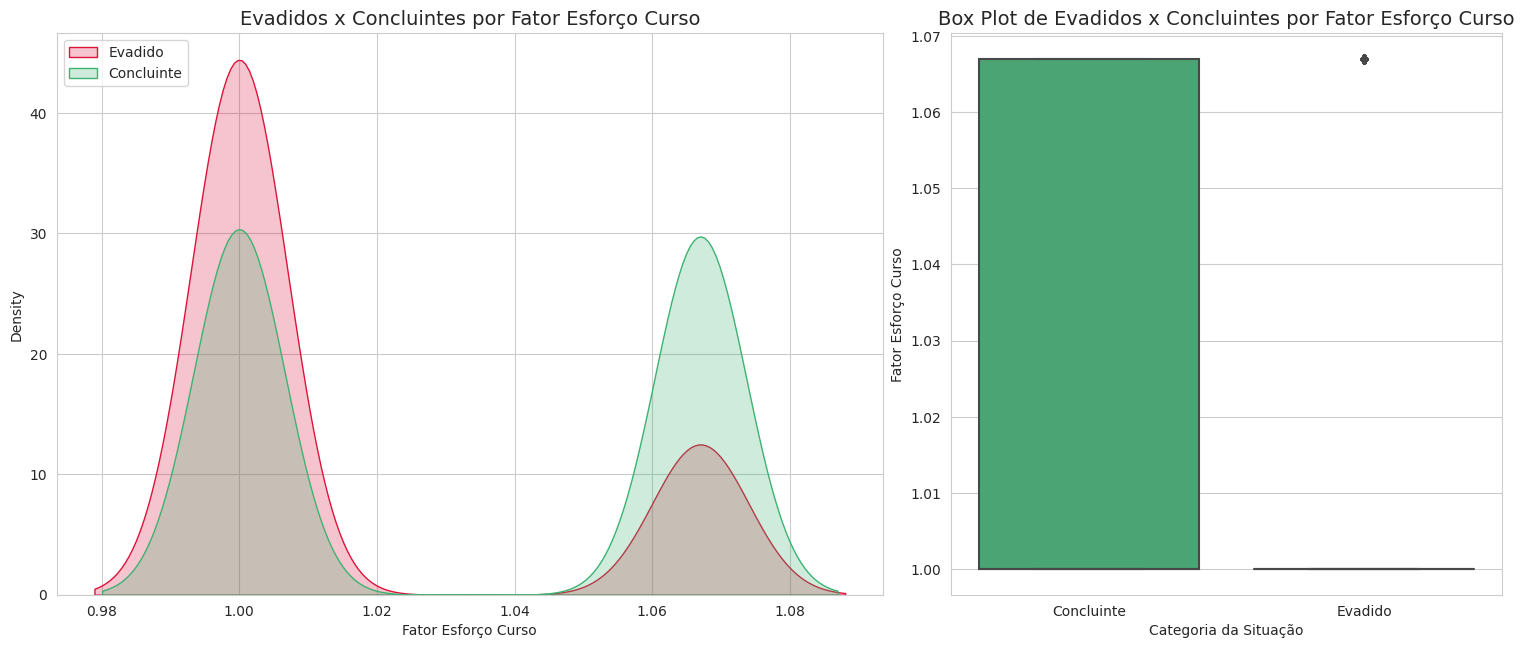

In [94]:
#plt.rcParams['font.family'] = 'Arial'
fig = plt.figure(constrained_layout=True, figsize=(15, 12))

gs = GridSpec(2, 5, figure=fig)
ax1 = fig.add_subplot(gs[0, :3])
ax2 = fig.add_subplot(gs[0, 3:])

sns.kdeplot(data[data['Categoria da Situação']=='Evadido']['Fator Esforço Curso'], ax=ax1,
             color='crimson', shade=True, label='Evadido')
sns.kdeplot(data[data['Categoria da Situação']=='Concluinte']['Fator Esforço Curso'], ax=ax1,
             color='mediumseagreen', shade=True, label='Concluinte')
ax1.set_title('Evadidos x Concluintes por Fator Esforço Curso', size=14)
ax1.legend(loc='upper left')

sns.boxplot(x='Categoria da Situação', y='Fator Esforço Curso', data=data, palette=['mediumseagreen', 'crimson'], ax=ax2)
ax2.set_title('Box Plot de Evadidos x Concluintes por Fator Esforço Curso', size=14)
fig.show()

- O fator de esforço de curso tem distribuições iguais tanto para evadido quanto para concluinte, também não tem influência na evasão.

In [42]:
pd.crosstab(data['Idade'],data['Categoria da Situação']).reset_index()

Categoria da Situação,Idade,Concluinte,Evadido
0,9.0,2,0
1,11.0,1,0
2,14.0,0,4
3,15.0,0,105
4,16.0,14,213
5,17.0,299,173
6,18.0,1053,147
7,19.0,1325,142
8,20.0,462,127
9,21.0,96,34


Abaixo de 15 anos e acima de 22 anos o número de estudantes é muito baixo, então pode ser descartado.

In [43]:
aux = data[(data['Idade']>=15) & (data['Idade']<=22)]

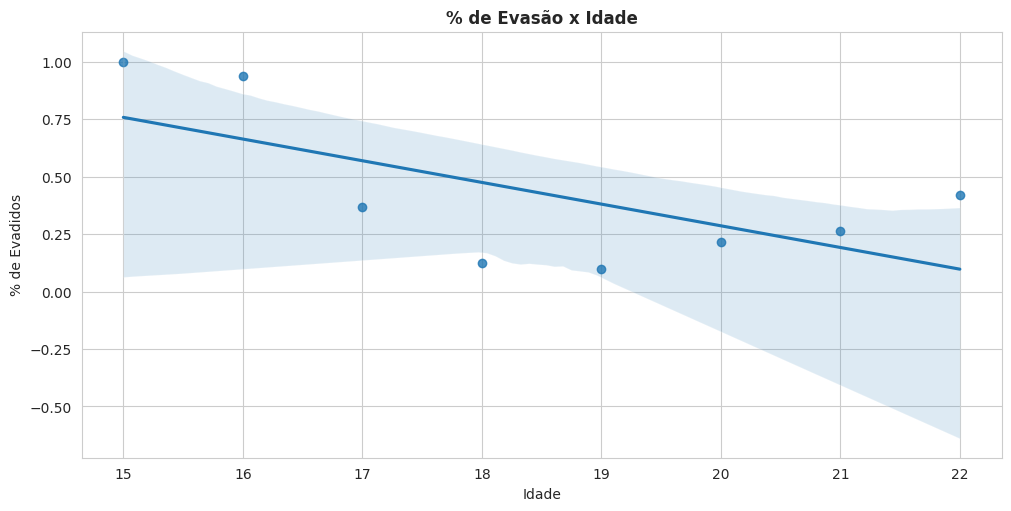

In [45]:
#plt.rcParams['font.family'] = 'Arial'
aux = pd.crosstab(aux['Idade'],aux['Categoria da Situação'], normalize='index').reset_index()
aux.rename(columns={'Evadido':'% de Evadidos'}, inplace=True)
plt.figure(constrained_layout=True, figsize=(10, 5))
plt.title('% de Evasão x Idade',fontweight='bold')
sns.regplot(aux,x='Idade',y='% de Evadidos')
plt.show()

- Há uma clara tendência de diminuição na porcentagem de evasão conforme a idade dos estudantes aumenta nessa faixa etária. A linha de tendência mostra uma inclinação negativa, indicando uma correlação negativa entre idade e taxa de evasão.
- Aos 15 e 16 anos, observamos as maiores taxas de evasão, próximas a 100%. Essa geralmente é a idade de início do ensino médio, isso pode indicar dificuldade de adaptação nesta transição educacional.
- Há uma queda acentuada na evasão entre 16 e 17 anos. Geralmente nessa idade o estudante está no último ano do ensino médio, o gráfico sugere que ultrapassar os 17 anos pode ser um fator importante para a permanência nos estudos, uma vez que após essa a idade a evasão vai diminuindo de maneira gradual.
- A dispersão dos pontos indica que a idade, embora relevante, não é o único fator determinante na evasão. 



In [8]:
data['Data de Início do Ciclo'] = pd.to_datetime(data['Data de Início do Ciclo'])
data['Data de Fim Previsto do Ciclo'] = pd.to_datetime(data['Data de Fim Previsto do Ciclo'])
data['Mês de Ocorrência da Situação'] = pd.to_datetime(data['Mês de Ocorrência da Situação'])

In [9]:
data ['mes'] = data['Mês de Ocorrência da Situação'].dt.month_name(locale='pt_BR.utf8')

In [10]:
ordem = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

In [11]:
data['mes'] = pd.Categorical(data['mes'], categories=ordem, ordered=True)

In [22]:
aux1 = pd.crosstab(data['mes'],data['Categoria da Situação']).reset_index()

Text(0.5, 1.0, 'Quantidade de Evadidos e Concluintes por mês do ano')

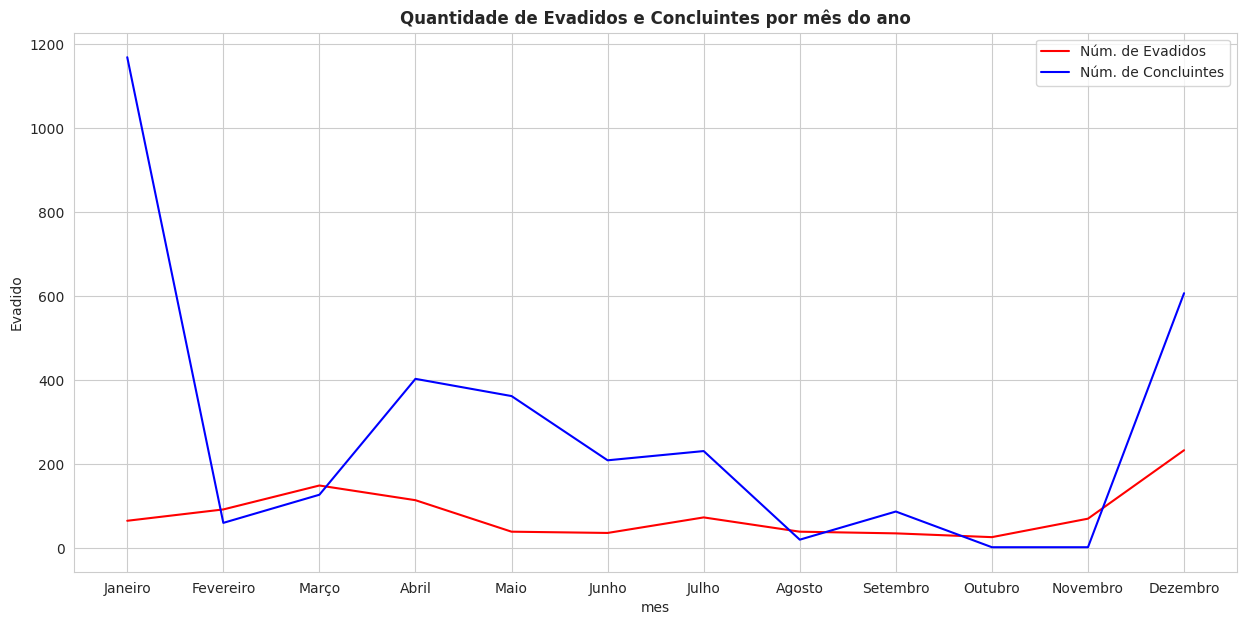

In [55]:
plt.figure(figsize=(15, 7))
sns.lineplot(aux1, x='mes',y='Evadido',label='Núm. de Evadidos',color='red')
# for x, y in zip(aux1['mes'],aux1['Evadido']):
#  plt.text(x = x, 
#  y = y-15, 
#  s = '{:.0f}'.format(y), 
#  color = 'white').set_backgroundcolor('red') 

sns.lineplot(aux1, x='mes',y='Concluinte',label='Núm. de Concluintes',color='blue')
plt.title('Quantidade de Evadidos e Concluintes por mês do ano',fontweight='bold')
# for x, y in zip(aux1['mes'],aux1['Concluinte']):
#  plt.text(x = x, 
#  y = y-15, 
#  s = '{:.0f}'.format(y), 
#  color = 'white').set_backgroundcolor('orange') 

- O alto número de conclusões em janeiro sugere que muitos estudantes finalizam seus cursos no fim do ano/início do ano seguinte.
- Os meses de maio a outubro mostram menor atividade, podendo ser um bom período para implementar estratégias de retenção.
- Nos meses de Março, Agosto, Outubro e Novembro o pico de Evadidos é maior que de Concluintes.
- Os meses que atencedem os picos podem ser cruciais para estrateǵias de intervenção.

In [56]:
#plt.rcParams['font.family'] = 'Arial'
# plt.figure(figsize=(15, 7))
# show_bars(211, 'mes', 'Categoria da Situação', data, palette='Set2', order=ordem)
# plt.title('Evasão por mês de ocorrência',fontweight='bold')
# plt.margins(y=0.5)  
# plt.tight_layout()